# Overview
* prep data for models

# Dependnecies

In [13]:
# general
from joblib import dump, load

# data
import numpy as np
import pandas as pd
import pyarrow as pa

# preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

# validation
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

# viz
import matplotlib.pyplot as plt

# Get Original Data

In [2]:
df_orig = pd.read_parquet("./data/diabetes.parquet")
df_orig.head()

,income,race,state,age,sex,height,weight,general_health,doctor,medical_costs,checkup,exercise,marital,education,smoking,alcohol,diabetes,BMI,year
0,10k-15k,white,AL,65-69,female,63.0,263.0,good,yes,no,1 year,no,single,12/ged,no,0,no,obese class III,2006
1,<10k,white,AL,55-59,male,75.0,290.0,poor,yes,yes,2 years,no,married,1-8,no,0,no,obese class II,2006
2,35k-50k,black,AL,40-44,male,71.0,230.0,very good,yes,no,1 year,yes,married,12/ged,no,0,no,obese class I,2006
3,10k-15k,black,AL,35-39,male,75.0,320.0,very good,no,yes,5 years,yes,single,12/ged,no,0,no,obese class II,2006
4,50k-75k,white,AL,50-54,female,64.0,120.0,excellent,yes,no,2 years,yes,married,cg,no,2,no,normal,2006


# Get Split Data

In [3]:
data_dir = "./data/"

x_train = np.load(data_dir + "x_train.npy")
y_train = np.load(data_dir + "y_train.npy")

x_test = np.load(data_dir + "x_test.npy")
y_test = np.load(data_dir + "y_test.npy")

x_validate = np.load(data_dir + "x_validate.npy")
y_validate = np.load(data_dir + "y_validate.npy")

# Get Models

In [4]:
# get logistic regression model
model_lr = load("model_lr.joblib")

# get random forest model
model_rf = load("model_rf.joblib")

# Overall Accuracy

In [5]:
%%time
# score logistic regression
# print(model_lr.score(x_train, y_train))
print(model_lr.score(x_test, y_test))

0.8526636799073678
Wall time: 309 ms


In [6]:
%%time
# score random forest
# print(model_rf.score(x_train, y_train))
print(model_rf.score(x_test, y_test))

0.8495938927392128
Wall time: 15.8 s


# Confusion Matrix

In [7]:
def calc_cm_stats(arr_cm):
    '''
    calc summary stats for confusion matrix
    
    arr_cm (np.array): confusion matrix
    - arr_cm = confusion_matrix(y_test, lr_y_predict, labels=[1,0])
    - e.g., array([ [494086,   9950],
                    [ 77594,  12548]], dtype=int64)
    '''
    
    # https://en.wikipedia.org/wiki/Confusion_matrix
    
    tp = arr_cm[0,0]  # true positive
    fp = arr_cm[1,0]  # false positive
    fn = arr_cm[0,1]  # false negative
    tn = arr_cm[1,1]  # true negative
    
    total = tp + fp + fn + tn
    
    accuracy = (tp + tn) / total  # same as model.score(x_test, y_test)
    
    sensitivity = tp / (tp + fn)  # aka true positive rate, recall, power
    specificity = tn / (tn + fp)  # aka true negative rate, selectivity
    
    return {
        'total': total,
        'tp': tp,
        'fp': fp,
        'fn': fn,
        'tn': tn,
        'accuracy': accuracy,
        'sensitivity': sensitivity,
        'specificity': specificity
    }

In [8]:
# logistic regression

# calc confusion matrix
lr_y_predict = model_lr.predict(x_test)
lr_arr_cm = confusion_matrix(y_test, lr_y_predict, labels=[1,0])
lr_arr_cm

array([[ 12548,  77594],
       [  9950, 494086]], dtype=int64)

In [9]:
# calc stats
dict_lr_cm_stats = calc_cm_stats(lr_arr_cm)
dict_lr_cm_stats

{'total': 594178,
 'tp': 12548,
 'fp': 9950,
 'fn': 77594,
 'tn': 494086,
 'accuracy': 0.8526636799073678,
 'sensitivity': 0.13920259146679684,
 'specificity': 0.9802593465546112}

In [10]:
# random forest

# calc confusion matrix
rf_y_predict = model_rf.predict(x_test)
rf_arr_cm = confusion_matrix(y_test, rf_y_predict, labels=[1,0])
rf_arr_cm

array([[  1519,  88623],
       [   745, 503291]], dtype=int64)

In [12]:
# calc stats
dict_rf_cm_stats = calc_cm_stats(rf_arr_cm)
dict_rf_cm_stats

{'total': 594178,
 'tp': 1519,
 'fp': 745,
 'fn': 88623,
 'tn': 503291,
 'accuracy': 0.8495938927392128,
 'sensitivity': 0.016851190344123718,
 'specificity': 0.9985219309731844}

# Lift Chart

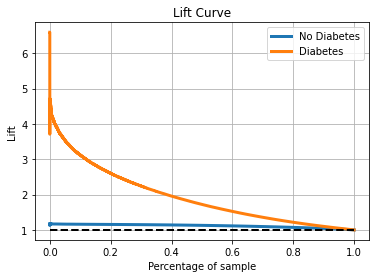

In [24]:
# logistic regression
lr_y_probas = model_lr.predict_proba(x_test)
lr_ax = skplt.metrics.plot_lift_curve(y_test, lr_y_probas)
lr_ax.legend(labels=["No Diabetes", "Diabetes"])
# plt.show()
plt.savefig("./lr_lift_chart.png")

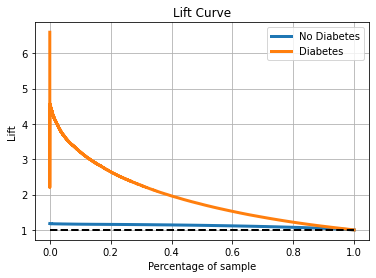

In [25]:
# random forest
rf_y_probas = model_rf.predict_proba(x_test)
rf_ax = skplt.metrics.plot_lift_curve(y_test, rf_y_probas)
rf_ax.legend(labels=["No Diabetes", "Diabetes"])
# plt.show()
plt.savefig("./rf_lift_chart.png")